In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix

In [30]:
eval = pd.read_csv("data/extrait_eval.csv")
sirh = pd.read_csv("data/extrait_sirh.csv")
sondage = pd.read_csv("data/extrait_sondage.csv")


In [31]:
print(eval.info())
eval.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


In [32]:
print(sirh.info())
sirh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB
N

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


In [33]:
sirh["nombre_heures_travailless"] = sirh["nombre_heures_travailless"].astype("object")

In [34]:
print(sondage.info())
sondage.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [41]:
#Affichage des informations selon le type de variable qualitatives ou quantitaves

for col in eval.columns:
    print(f"### Colonne : {col}\n")
        
    if eval[col].dtype == "object" or str(eval[col].dtype) == "category":
        print("Variable qualitative\n")
        print(eval[col].value_counts(dropna=False))
    else:
        print("Variable quantitative\n")
        print(eval[col].describe())
        
    print("\n" + "-"*50 + "\n")

### Colonne : satisfaction_employee_environnement

Variable quantitative

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: satisfaction_employee_environnement, dtype: float64

--------------------------------------------------

### Colonne : note_evaluation_precedente

Variable quantitative

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: note_evaluation_precedente, dtype: float64

--------------------------------------------------

### Colonne : niveau_hierarchique_poste

Variable quantitative

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: niveau_hierarchique_poste, dtype: float64

-------------------------------

In [36]:
#Affichage des informations selon le type de variable qualitatives ou quantitaves

for col in sirh.columns:
    print(f"### Colonne : {col}\n")
        
    if sirh[col].dtype == "object" or str(sirh[col].dtype) == "category":
        print("Variable qualitative\n")
        print(sirh[col].value_counts(dropna=False))
    else:
        print("Variable quantitative\n")
        print(sirh[col].describe())
        
    print("\n" + "-"*50 + "\n")

### Colonne : id_employee

Variable quantitative

count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: id_employee, dtype: float64

--------------------------------------------------

### Colonne : age

Variable quantitative

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

--------------------------------------------------

### Colonne : genre

Variable qualitative

genre
M    882
F    588
Name: count, dtype: int64

--------------------------------------------------

### Colonne : revenu_mensuel

Variable quantitative

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: revenu_mensuel, dtype: fl

In [37]:
sondage["nombre_employee_sous_responsabilite"] = sondage["nombre_employee_sous_responsabilite"].astype("object")

In [38]:
#Affichage des informations selon le type de variable qualitatives ou quantitaves

for col in sondage.columns:
    print(f"### Colonne : {col}\n")
        
    if sondage[col].dtype == "object" or str(sondage[col].dtype) == "category":
        print("Variable qualitative\n")
        print(sondage[col].value_counts(dropna=False))
    else:
        print("Variable quantitative\n")
        print(sondage[col].describe())
        
    print("\n" + "-"*50 + "\n")

### Colonne : a_quitte_l_entreprise

Variable qualitative

a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64

--------------------------------------------------

### Colonne : nombre_participation_pee

Variable quantitative

count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: nombre_participation_pee, dtype: float64

--------------------------------------------------

### Colonne : nb_formations_suivies

Variable quantitative

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: nb_formations_suivies, dtype: float64

--------------------------------------------------

### Colonne : nombre_employee_sous_responsabilite

Variable qualitative

nombre_employee_sous_responsabilite
1    1470
Name: count, dtype: int64

--------------

In [39]:
print(eval.loc[eval[['eval_number']].duplicated(keep=False),:])
print(sirh.loc[sirh[['id_employee']].duplicated(keep=False),:])
print(sondage.loc[sondage[['code_sondage']].duplicated(keep=False),:])

Empty DataFrame
Columns: [satisfaction_employee_environnement, note_evaluation_precedente, niveau_hierarchique_poste, satisfaction_employee_nature_travail, satisfaction_employee_equipe, satisfaction_employee_equilibre_pro_perso, eval_number, note_evaluation_actuelle, heure_supplementaires, augementation_salaire_precedente]
Index: []
Empty DataFrame
Columns: [id_employee, age, genre, revenu_mensuel, statut_marital, departement, poste, nombre_experiences_precedentes, nombre_heures_travailless, annee_experience_totale, annees_dans_l_entreprise, annees_dans_le_poste_actuel]
Index: []
Empty DataFrame
Columns: [a_quitte_l_entreprise, nombre_participation_pee, nb_formations_suivies, nombre_employee_sous_responsabilite, code_sondage, distance_domicile_travail, niveau_education, domaine_etude, ayant_enfants, frequence_deplacement, annees_depuis_la_derniere_promotion, annes_sous_responsable_actuel]
Index: []


In [40]:
eval["key"] = pd.to_numeric(
    eval["eval_number"].astype("string").str.replace(r"^E[_-]?", "", regex=True),
    errors="coerce"
).astype("Int64")

sirh["key"] = pd.to_numeric(sirh["id_employee"], errors="coerce").astype("Int64")
sondage["key"] = pd.to_numeric(sondage["code_sondage"], errors="coerce").astype("Int64")

In [ ]:
data = (
    eval.merge(sirh, on="key", how="outer", suffixes=("", "_sirh"))
        .merge(sondage, on="key", how="outer", suffixes=("", "_sond"))
)

# Si tu relies la logique "qualitative vs quantitative" à dtypes :
merged["key"] = merged["key"].astype("category")  # ou string
# …et/ou exclure explicitement `key` de tes features :
features = merged.drop(columns=["key"])


In [42]:
data = (
    eval.merge(
        sirh, on="key", how="outer",
        suffixes=("", "_sirh"),
        validate="one_to_one",
        indicator="_merge_eval_sirh"
    ).merge(
        sondage, on="key", how="outer",
        suffixes=("", "_sond"),
        validate="one_to_one"  # adapte selon ta cardinalité réelle
    )
)

data["key"] = data["key"].astype("category")  # identifiant ≠ feature numérique
features = data.drop(columns=["key"])

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   note_evaluation_actuelle                   1470 non-null   int64 
 7   heure_supplementaires                      1470 non-null   object
 8   augementation_salaire_precedente           1470 non-null   object
 9   age                                        1470 non-null   int64 
 10  genre                               

In [65]:
#Affichage des informations selon le type de variable qualitatives ou quantitaves

for col in data.columns:
    print(f"### Colonne : {col}\n")
        
    if data[col].dtype == "object" or str(data[col].dtype) == "category":
        print("Variable qualitative\n")
        print(data[col].value_counts(dropna=False))
    else:
        print("Variable quantitative\n")
        print(data[col].describe())
        
    print("\n" + "-"*50 + "\n")

### Colonne : satisfaction_employee_environnement

Variable quantitative

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: satisfaction_employee_environnement, dtype: float64

--------------------------------------------------

### Colonne : note_evaluation_precedente

Variable quantitative

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: note_evaluation_precedente, dtype: float64

--------------------------------------------------

### Colonne : niveau_hierarchique_poste

Variable quantitative

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: niveau_hierarchique_poste, dtype: float64

-------------------------------

In [46]:
del data["eval_number"]
del data["key"]
del data["id_employee"]
del data["nombre_heures_travailless"]
del data["_merge_eval_sirh"]
del data["nombre_employee_sous_responsabilite"]
del data["code_sondage"]
del data["ayant_enfants"]

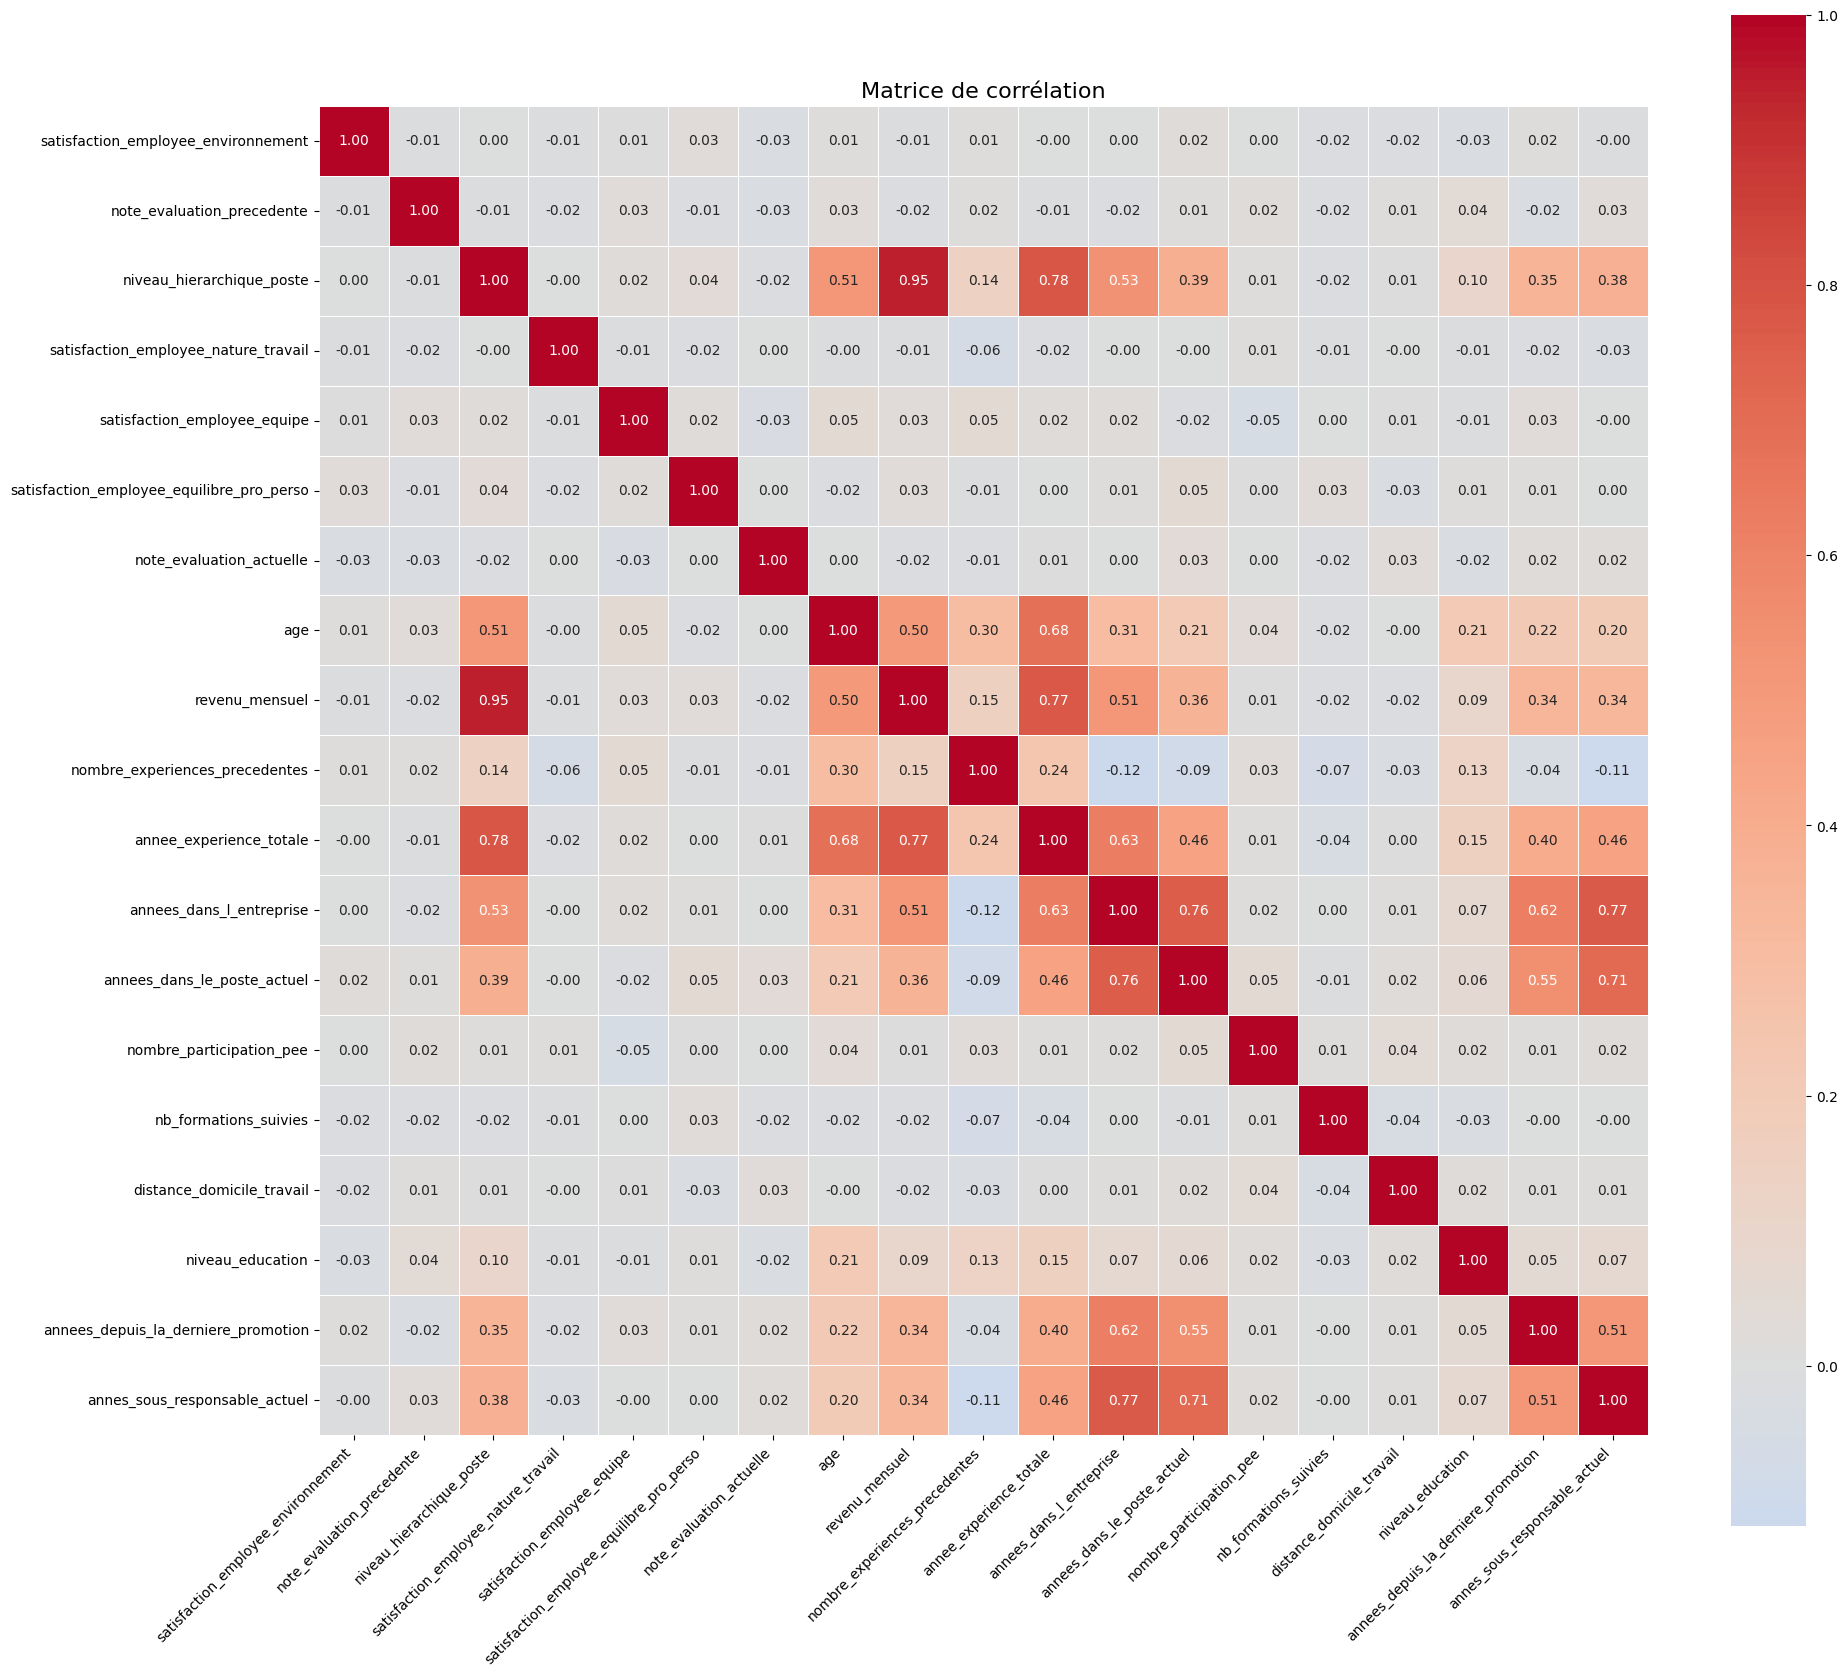

In [48]:
matrice_correlation_pearson = (
     data.corr(method='pearson', numeric_only=True)
)

plt.figure(figsize=(20, 20))

sns.heatmap(
    matrice_correlation_pearson,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Matrice de corrélation",
    fontsize=16
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype, is_bool_dtype, is_categorical_dtype, is_string_dtype

def auto_plots(
    df: pd.DataFrame,
    target: str | None = None,
    id_cols: list[str] | None = None,
    top_n: int = 20,
    bins: str | int = "auto",
    figsize_num: tuple[int, int] = (9, 5),
    figsize_cat: tuple[int, int] = (9, 5),
):
    if id_cols is None:
        id_cols = []
    cols = [c for c in df.columns if c not in id_cols]

    for col in cols:
        s = df[col]
        # ignorer colonnes vides/constantes
        if s.nunique(dropna=False) <= 1:
            continue

        try:
            is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)

            if is_qual:
                counts = s.astype("object").fillna("NA").value_counts().head(top_n)
                plt.figure(figsize=figsize_cat)
                counts.plot(kind="bar")
                plt.title(f"{col} — top {min(top_n, counts.shape[0])} modalités (effectifs)")
                plt.xlabel(col); plt.ylabel("Effectif")
                plt.xticks(rotation=45, ha="right")
                plt.tight_layout(); plt.show()

                if target and target in df.columns:
                    order = counts.index
                    ctab = pd.crosstab(
                        s.astype("object").fillna("NA"),
                        df[target].astype("object").fillna("NA"),
                        normalize="index"
                    ).loc[order]
                    plt.figure(figsize=figsize_cat)
                    ctab.plot(kind="bar", stacked=True)
                    plt.title(f"{col} — répartition de {target} par modalité (normalisée)")
                    plt.xlabel(col); plt.ylabel("Proportion")
                    plt.legend(title=target, bbox_to_anchor=(1.02, 1), loc="upper left")
                    plt.tight_layout(); plt.show()

            elif is_numeric_dtype(s):
                # discrète si <=10 valeurs distinctes
                if s.nunique(dropna=True) <= 10:
                    counts = s.value_counts(dropna=False).sort_index()
                    plt.figure(figsize=figsize_num)
                    counts.plot(kind="bar")
                    plt.title(f"{col} — effectifs (numérique discret)")
                    plt.xlabel(col); plt.ylabel("Effectif")
                    plt.xticks(rotation=0)
                    plt.tight_layout(); plt.show()

                    if target and target in df.columns:
                        order = counts.index
                        ctab = pd.crosstab(
                            s, df[target].astype("object").fillna("NA"),
                            normalize="index"
                        ).loc[order]
                        plt.figure(figsize=figsize_num)
                        ctab.plot(kind="bar", stacked=True)
                        plt.title(f"{col} — répartition de {target} (discret, normalisée)")
                        plt.xlabel(col); plt.ylabel("Proportion")
                        plt.legend(title=target, bbox_to_anchor=(1.02, 1), loc="upper left")
                        plt.tight_layout(); plt.show()

                else:
                    # ===== PATCH: utiliser Matplotlib directement pour l'histogramme =====
                    arr = s.dropna().to_numpy()
                    if arr.size >= 2:
                        plt.figure(figsize=figsize_num)
                        plt.hist(arr, bins=bins)   # au lieu de s.plot(kind="hist", ...)
                        plt.title(f"{col} — histogramme")
                        plt.xlabel(col); plt.ylabel("Effectif")
                        plt.tight_layout(); plt.show()

                        plt.figure(figsize=(figsize_num[0], 1.6))
                        plt.boxplot(arr, vert=False)
                        plt.title(f"{col} — boxplot")
                        plt.tight_layout(); plt.show()
                    else:
                        # pas assez de données non-NaN pour un histo/boxplot
                        pass
            else:
                # fallback
                counts = s.astype("object").fillna("NA").value_counts().head(top_n)
                plt.figure(figsize=figsize_cat)
                counts.plot(kind="bar")
                plt.title(f"{col} — effectifs (fallback)")
                plt.xlabel(col); plt.ylabel("Effectif")
                plt.xticks(rotation=45, ha="right")
                plt.tight_layout(); plt.show()

        except Exception as e:
            print(f"[WARN] Plot ignoré pour '{col}' → {type(e).__name__}: {e}")
            continue


C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


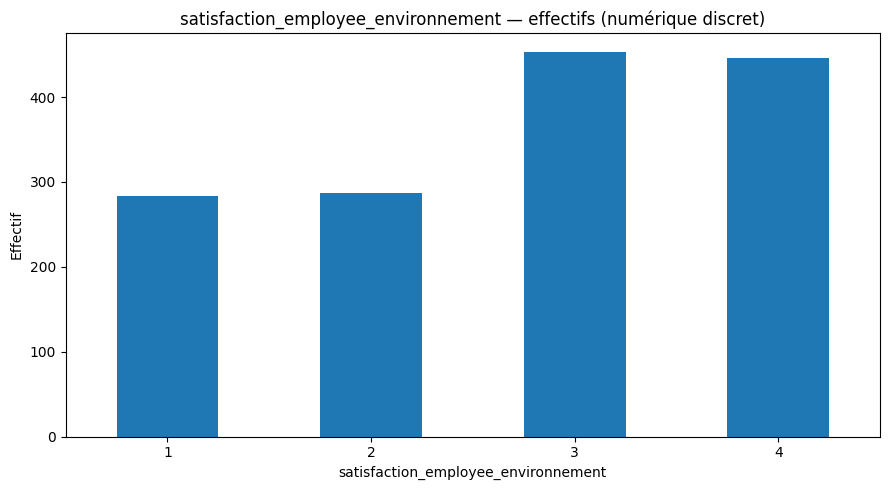

<Figure size 900x500 with 0 Axes>

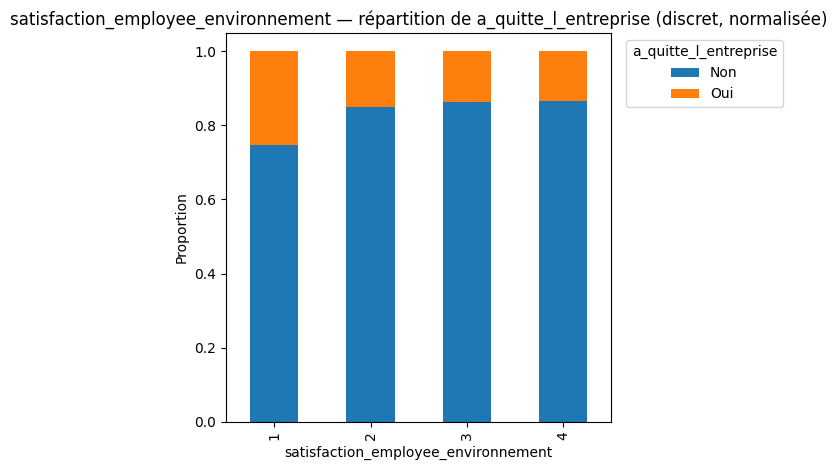

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


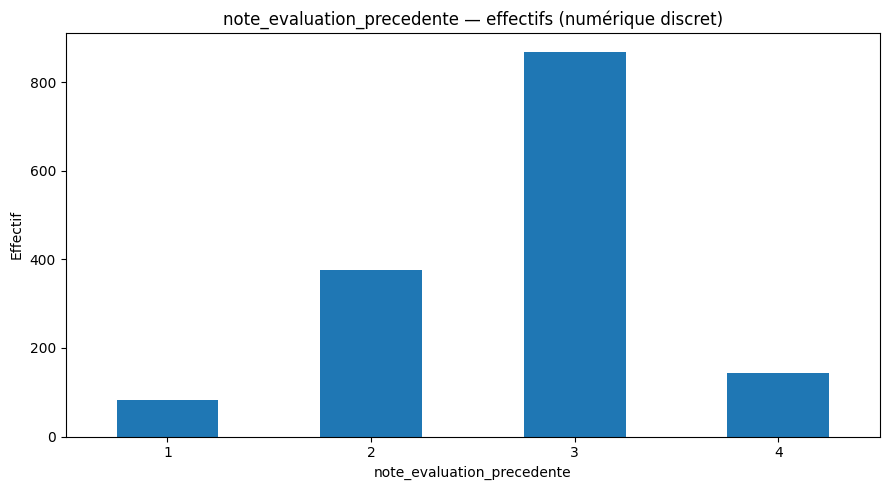

<Figure size 900x500 with 0 Axes>

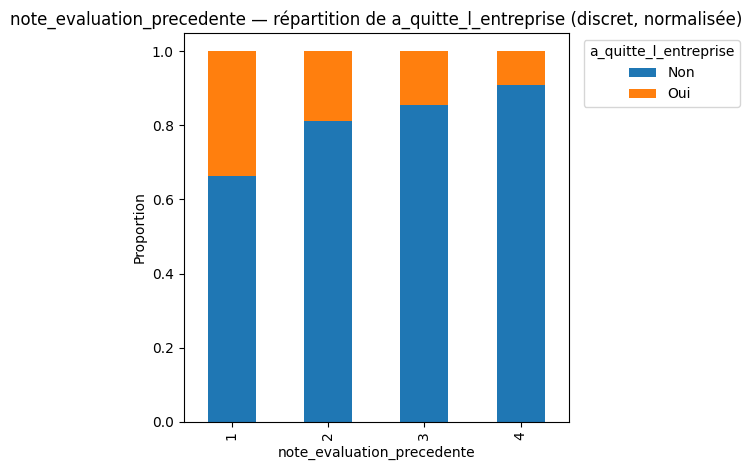

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


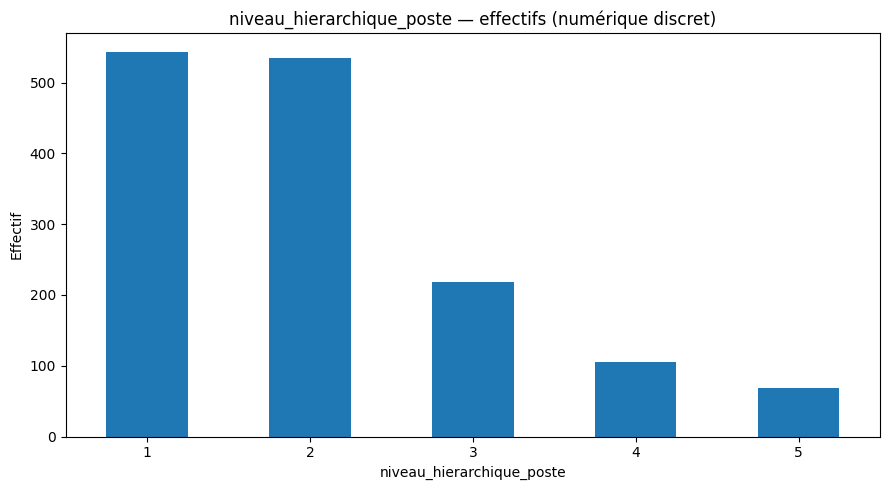

<Figure size 900x500 with 0 Axes>

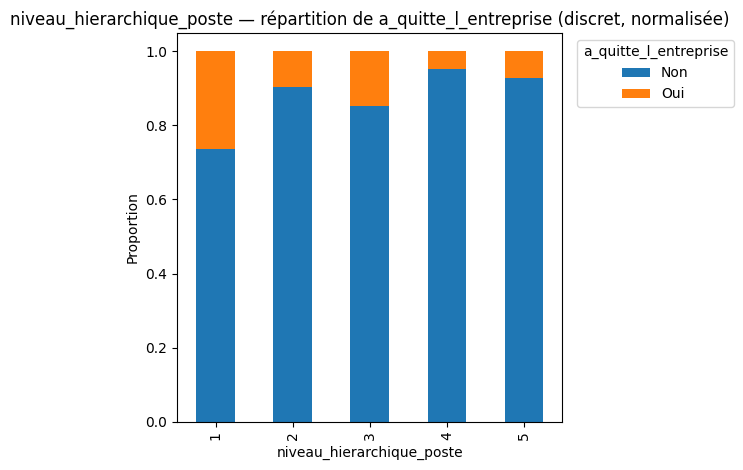

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


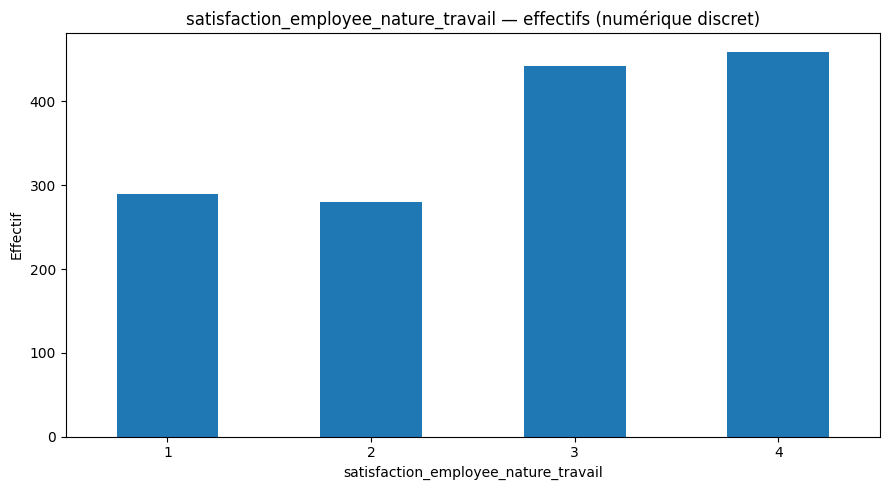

<Figure size 900x500 with 0 Axes>

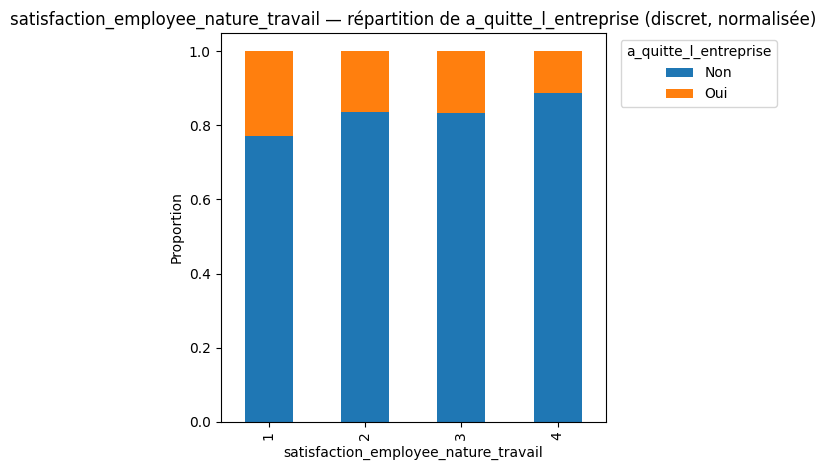

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


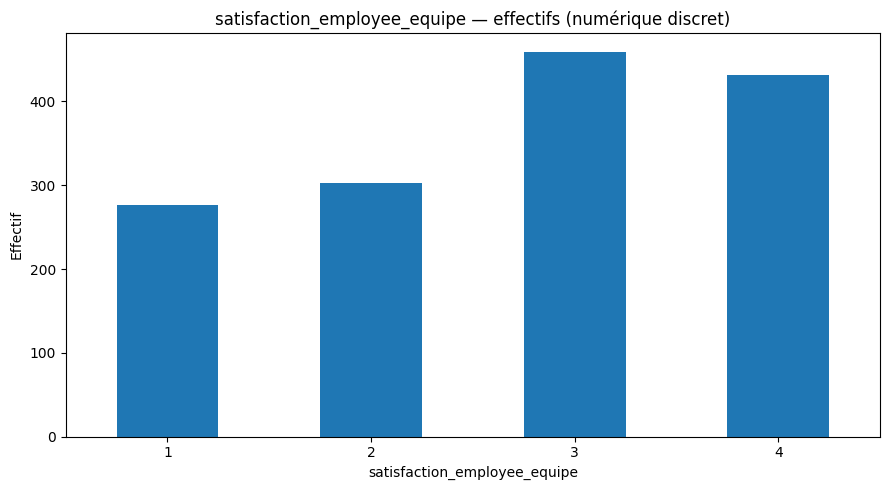

<Figure size 900x500 with 0 Axes>

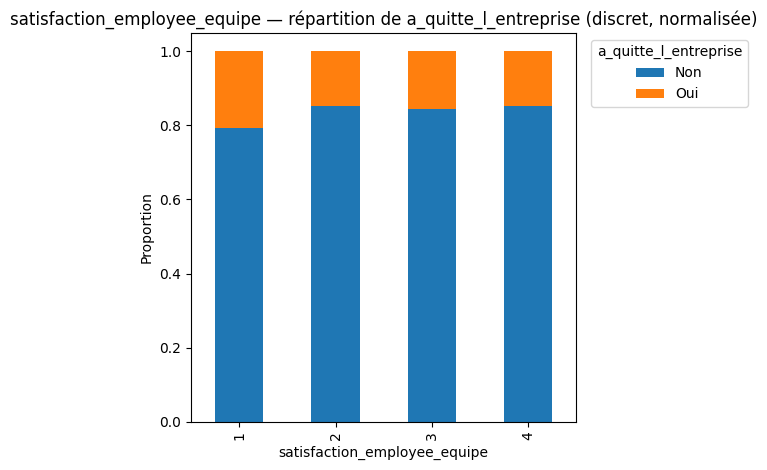

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


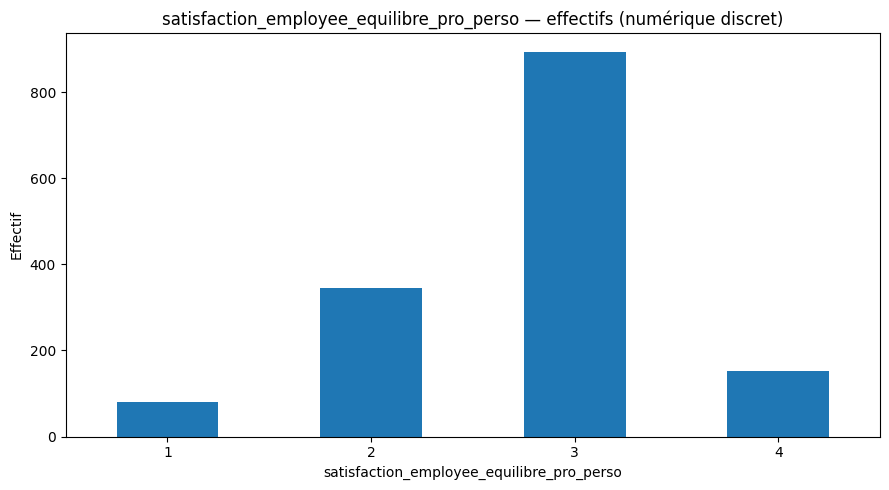

<Figure size 900x500 with 0 Axes>

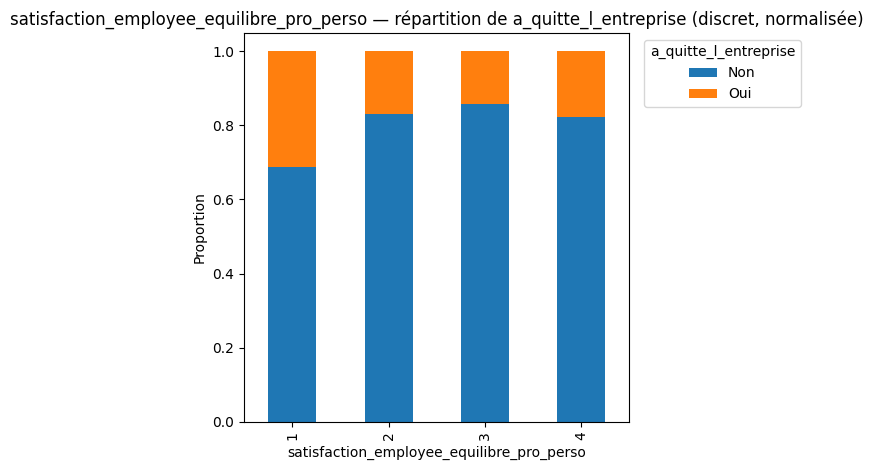

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


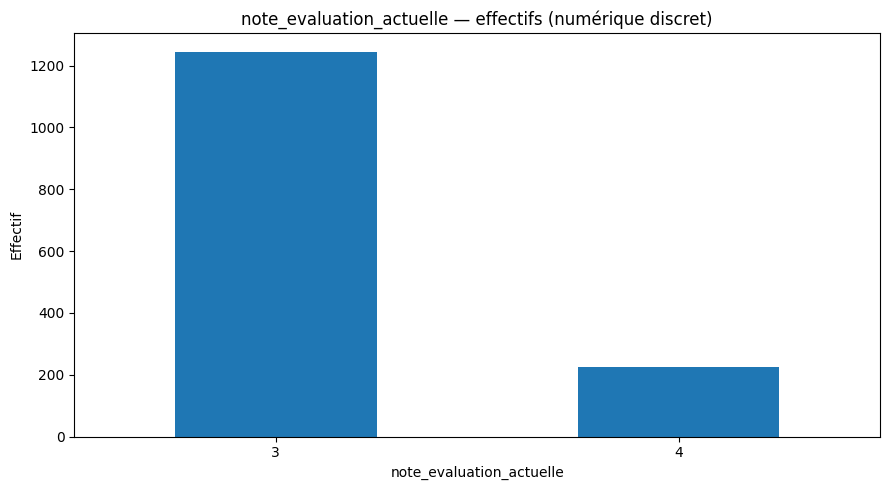

<Figure size 900x500 with 0 Axes>

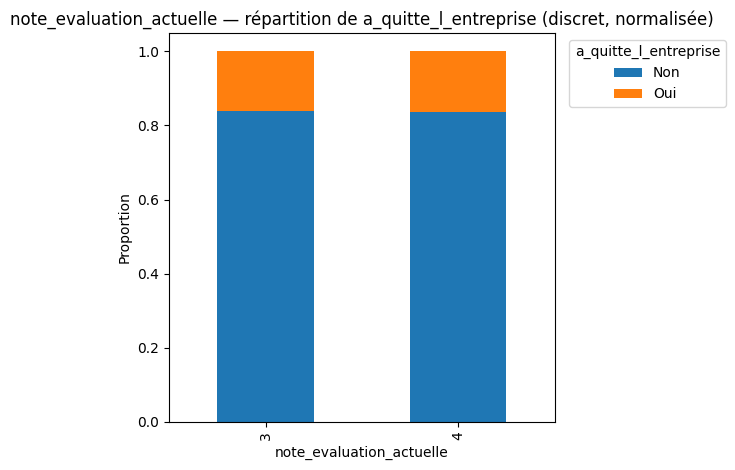

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


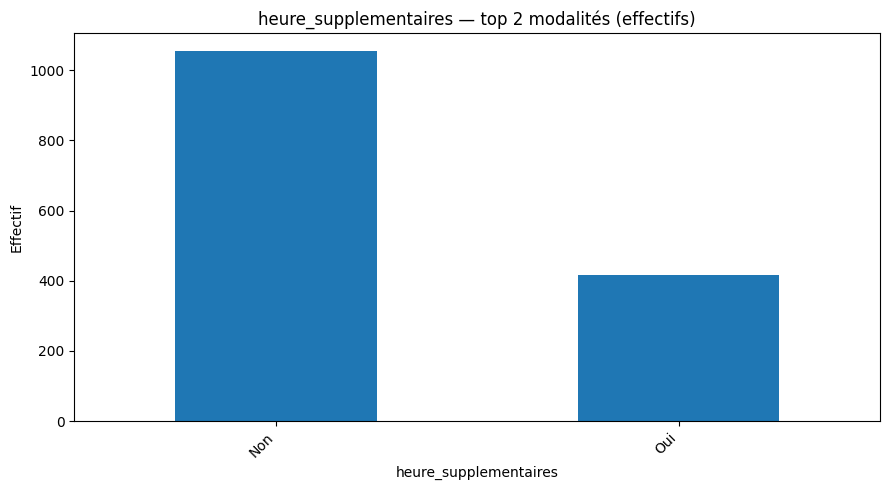

<Figure size 900x500 with 0 Axes>

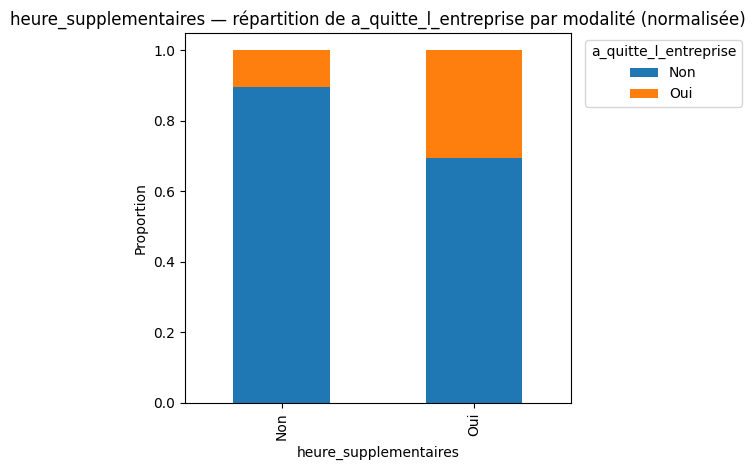

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


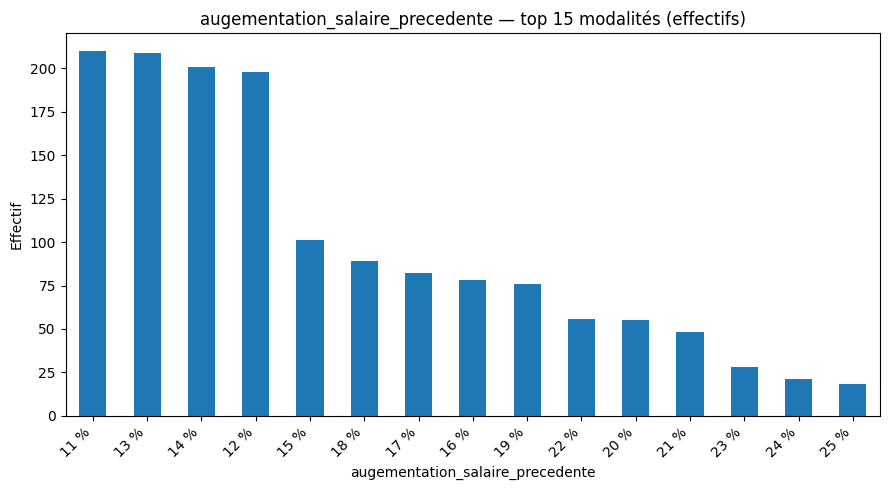

<Figure size 900x500 with 0 Axes>

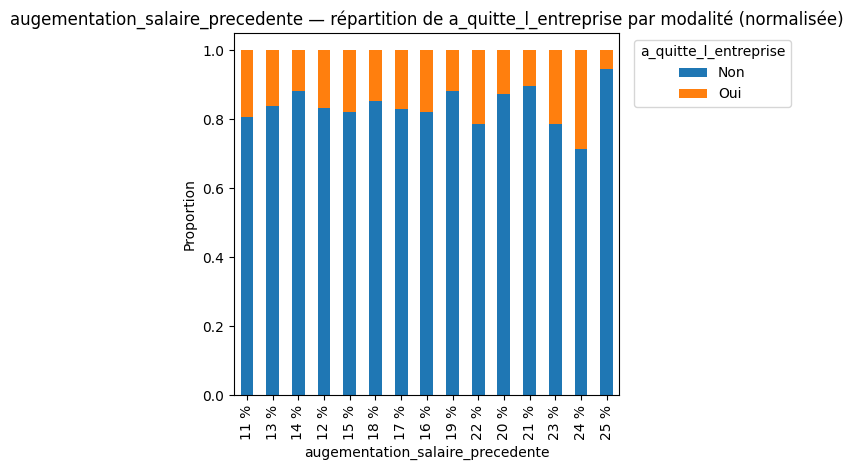

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


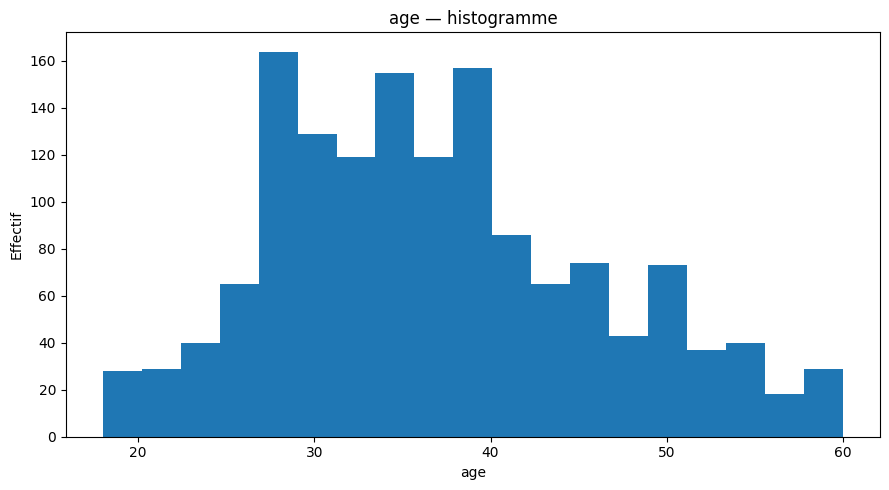

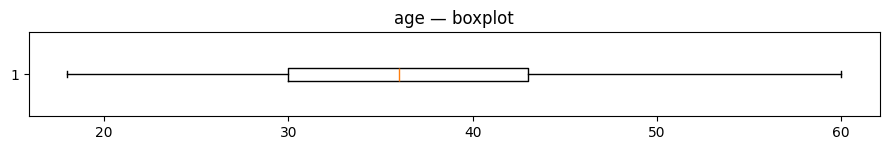

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


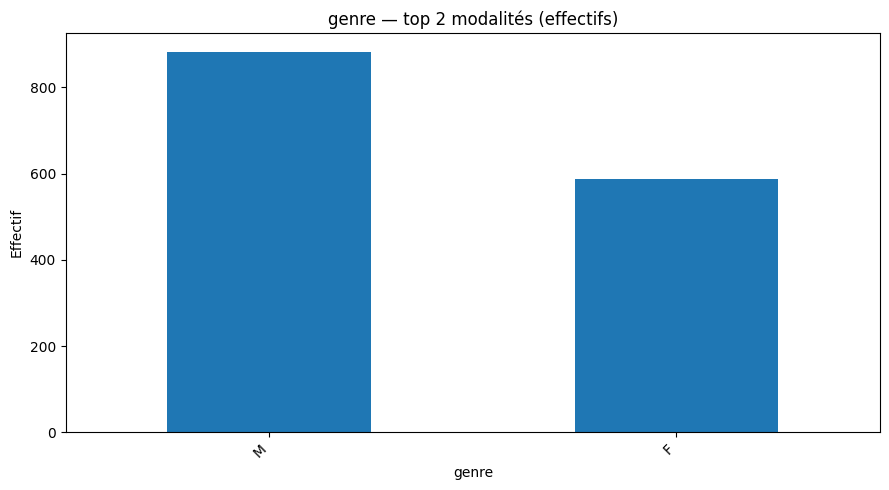

<Figure size 900x500 with 0 Axes>

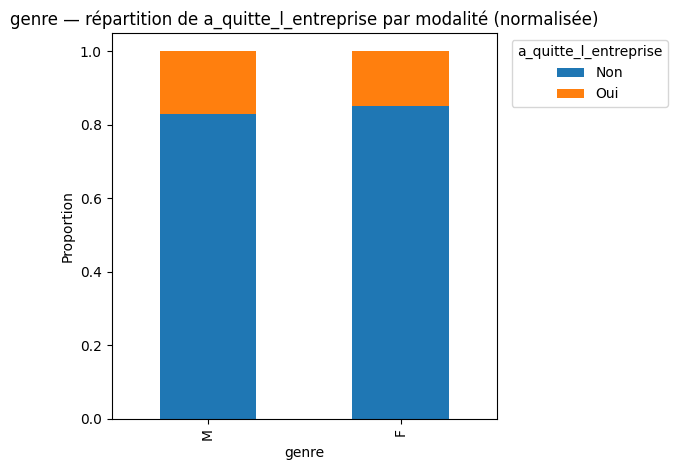

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


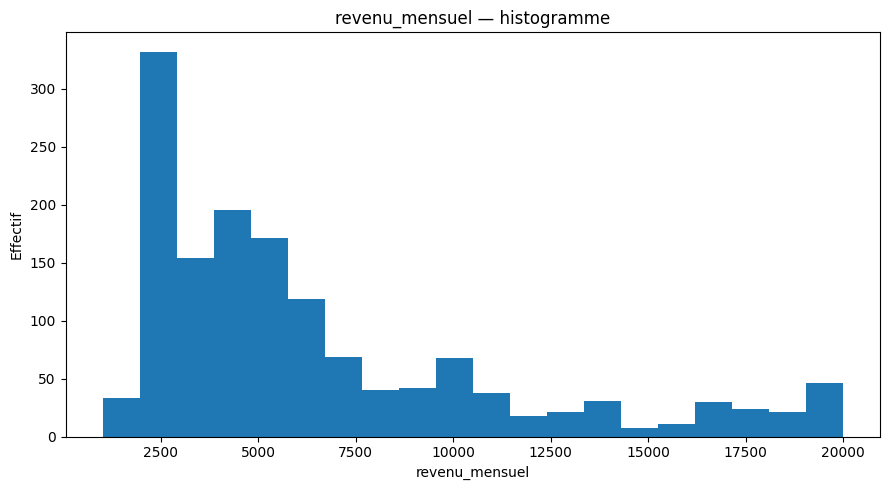

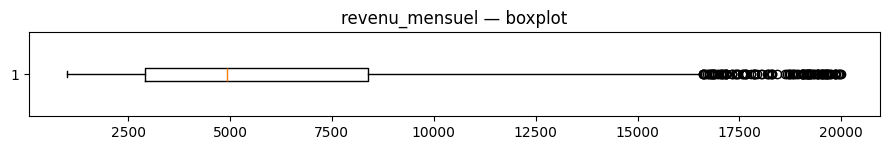

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


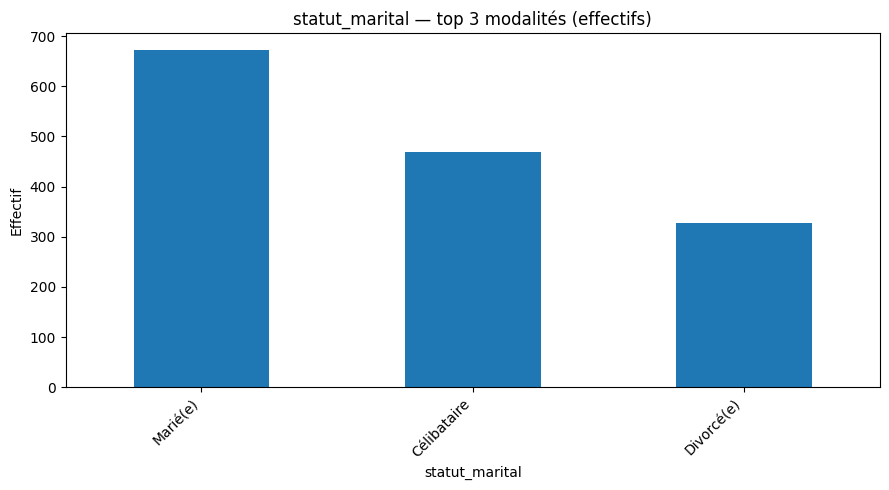

<Figure size 900x500 with 0 Axes>

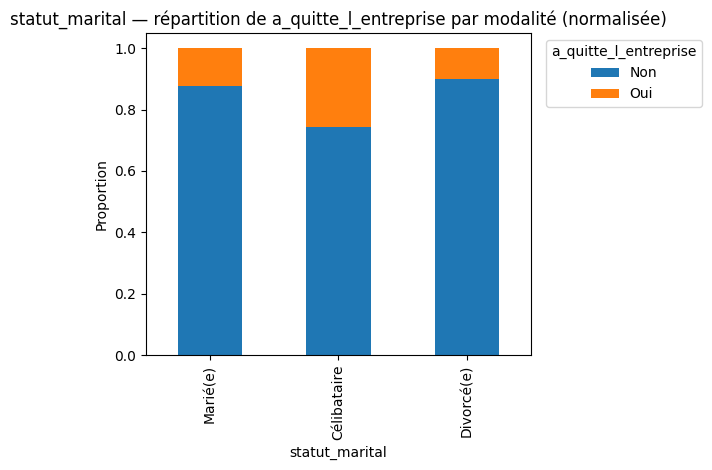

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


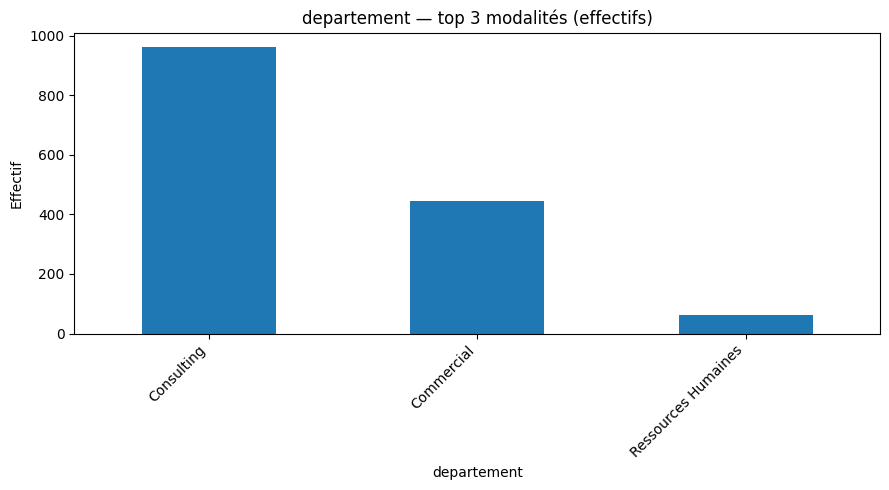

<Figure size 900x500 with 0 Axes>

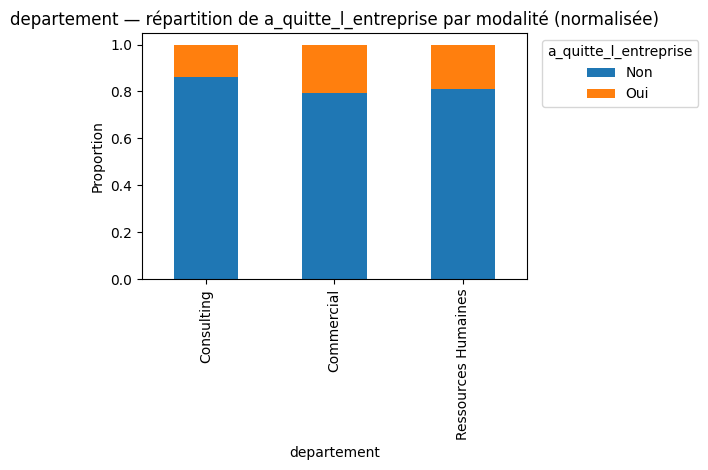

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


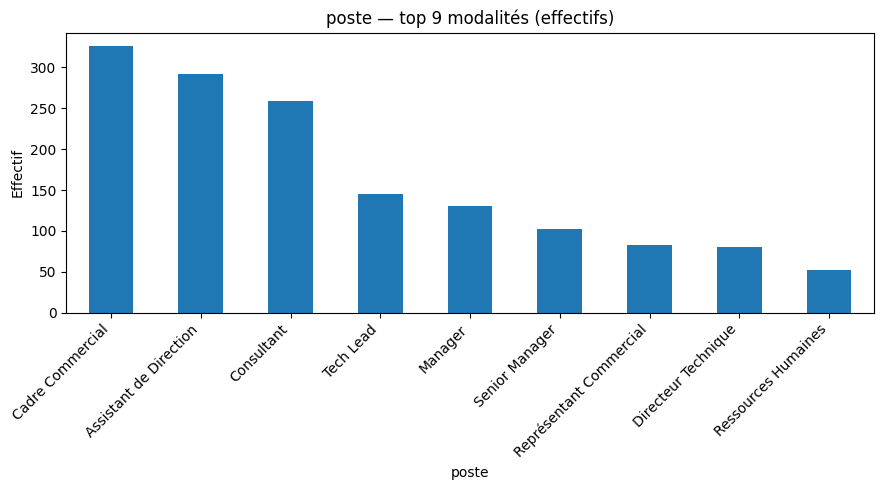

<Figure size 900x500 with 0 Axes>

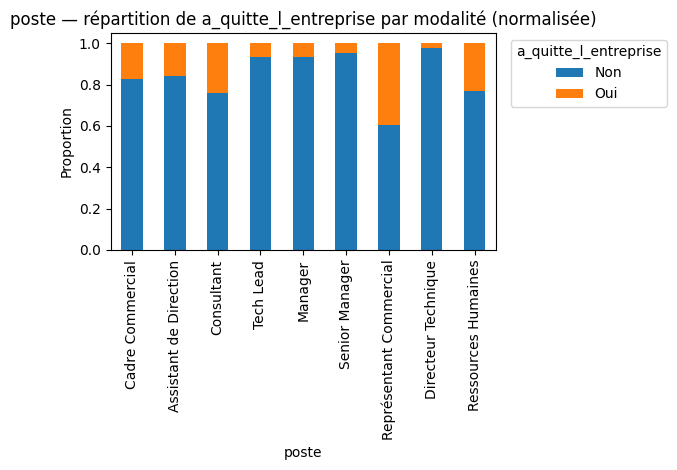

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


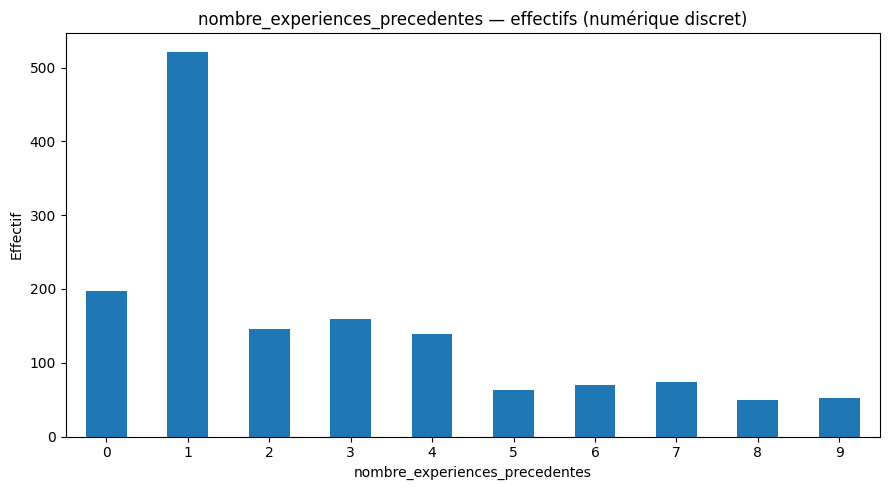

<Figure size 900x500 with 0 Axes>

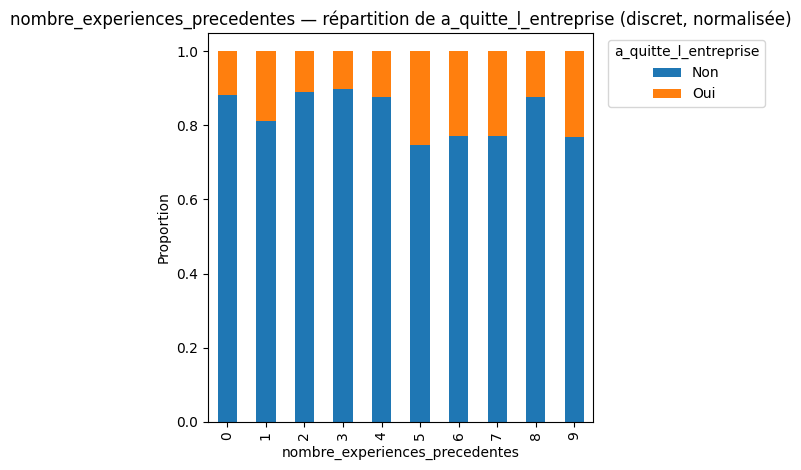

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


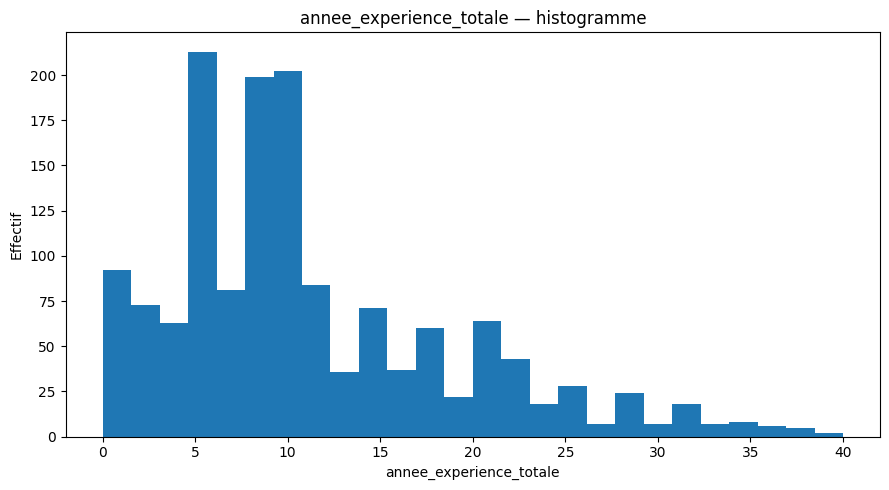

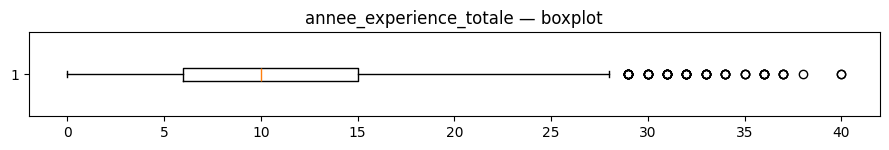

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


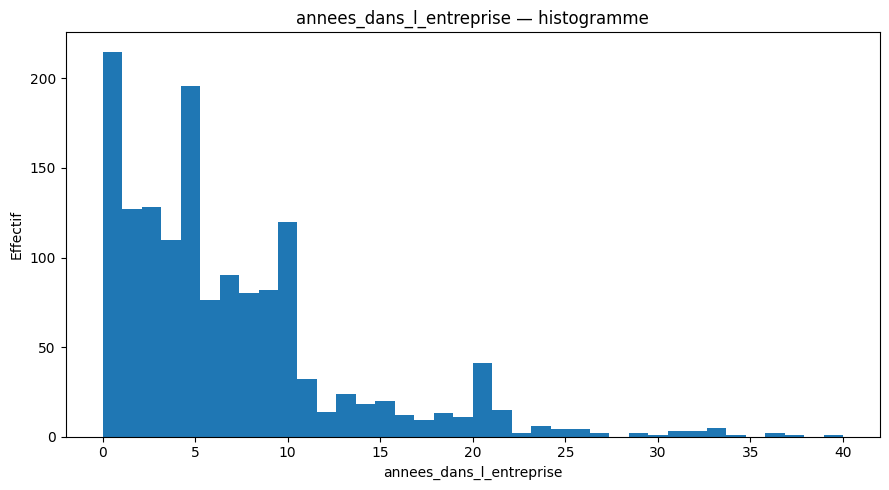

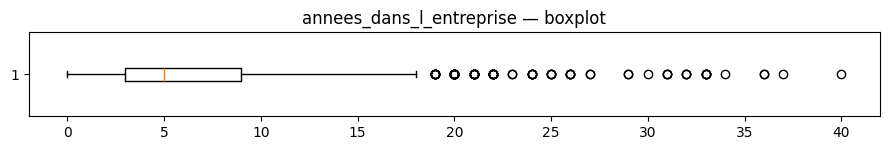

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


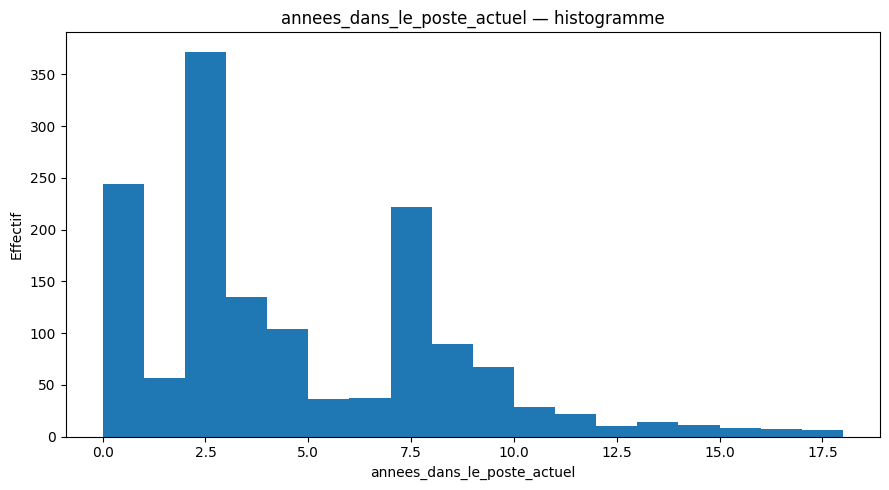

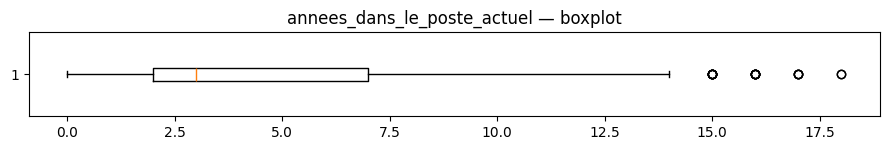

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


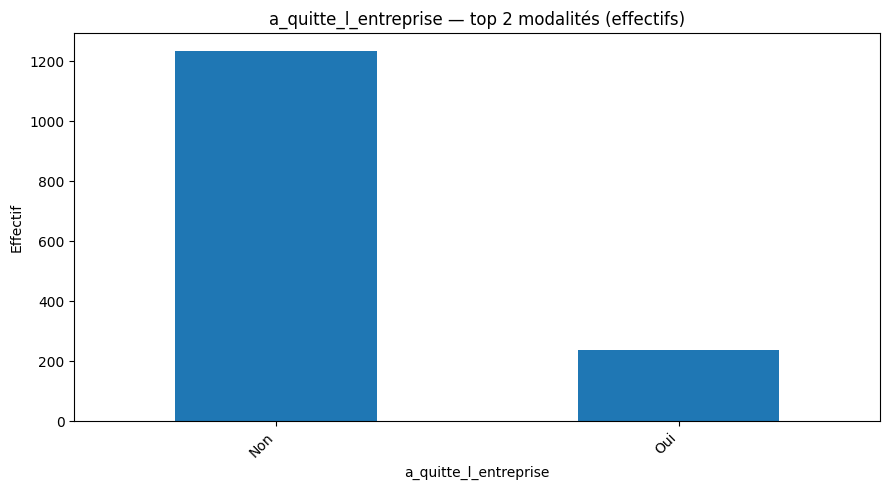

<Figure size 900x500 with 0 Axes>

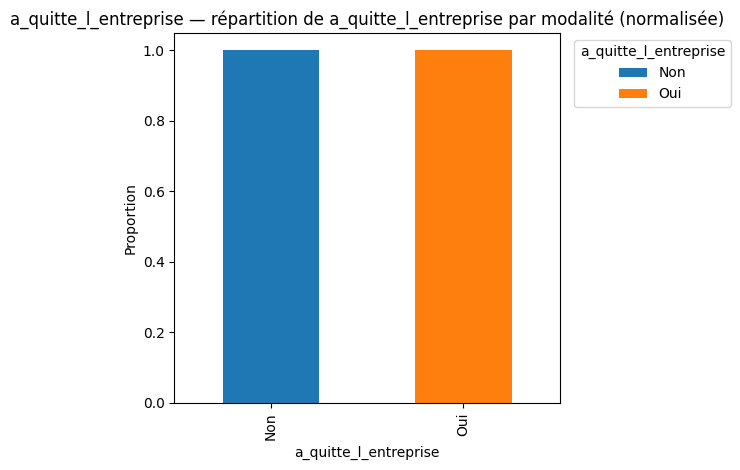

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


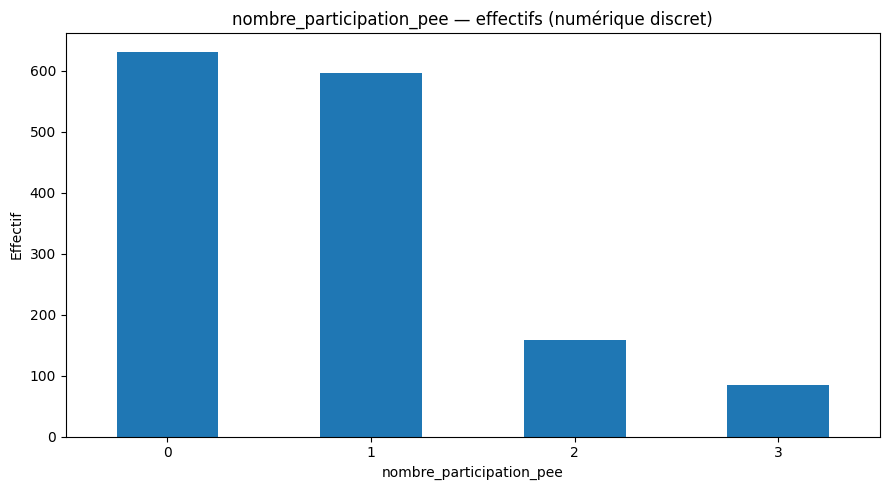

<Figure size 900x500 with 0 Axes>

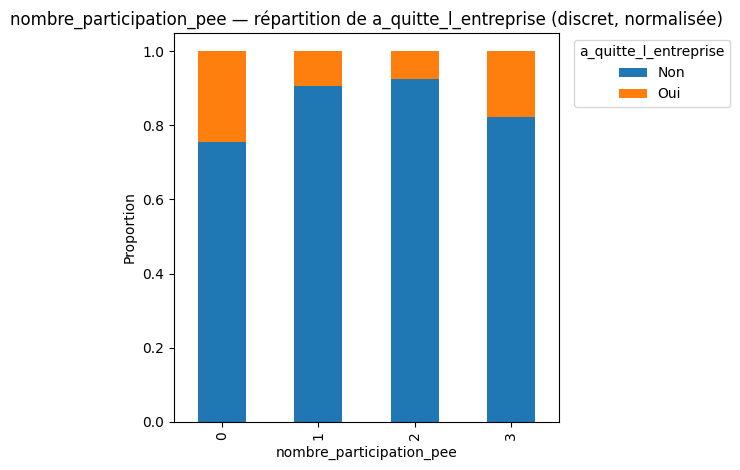

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


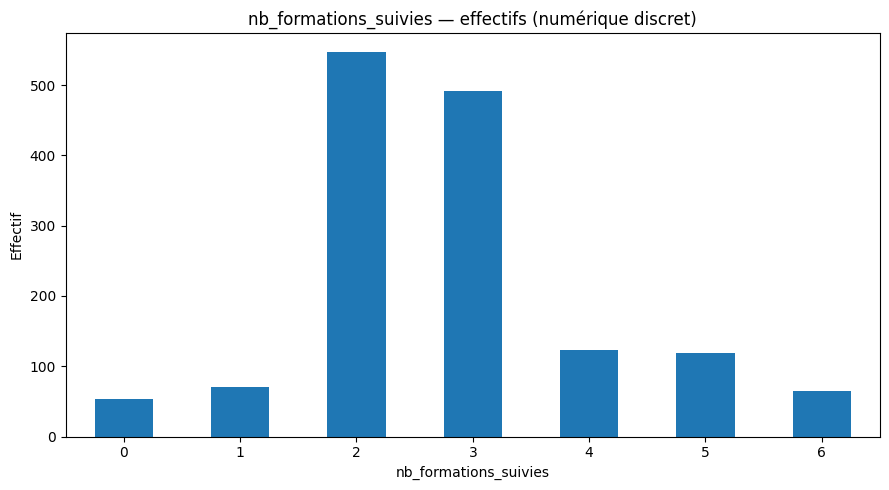

<Figure size 900x500 with 0 Axes>

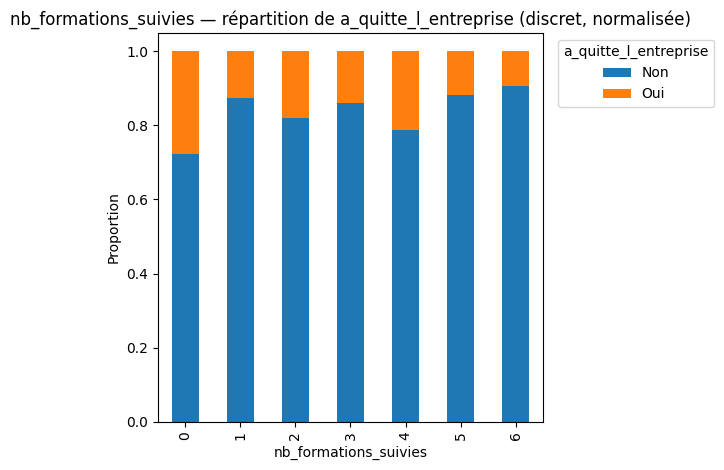

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


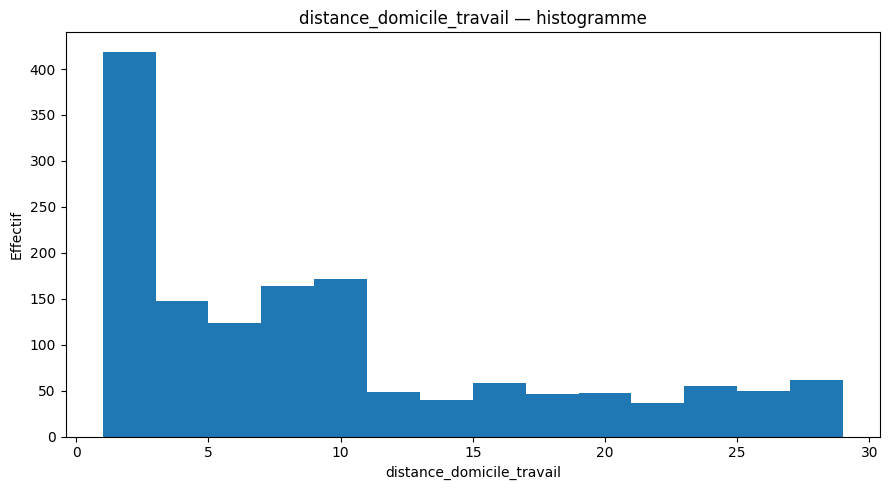

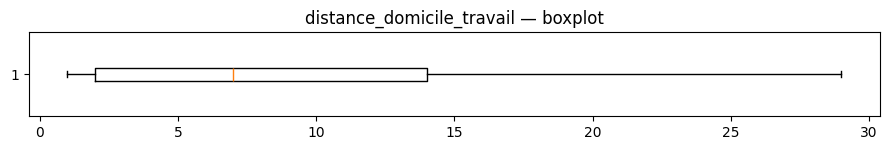

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


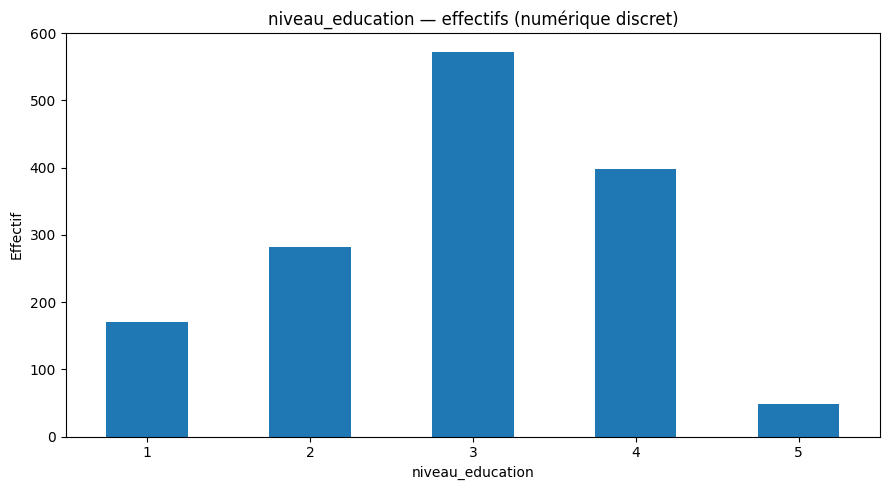

<Figure size 900x500 with 0 Axes>

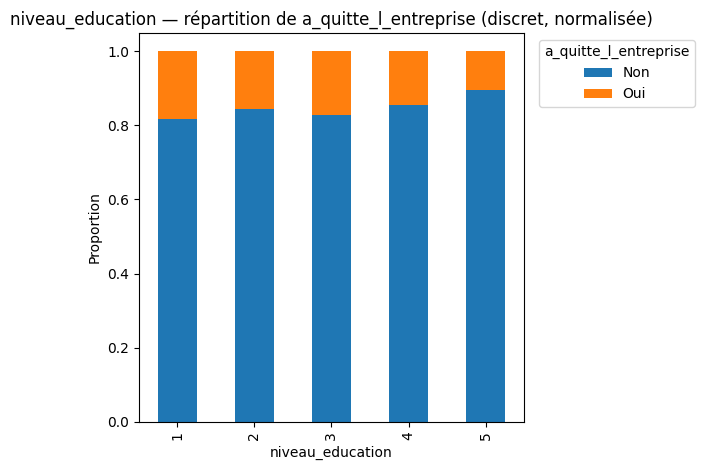

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


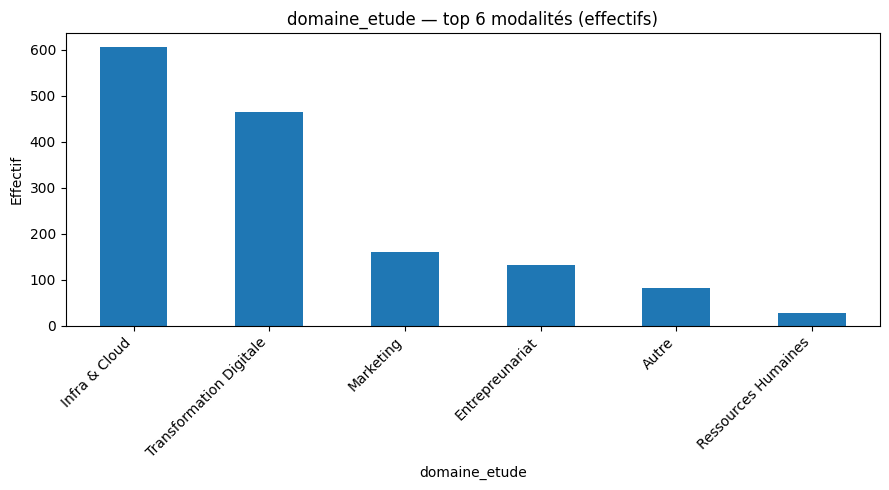

<Figure size 900x500 with 0 Axes>

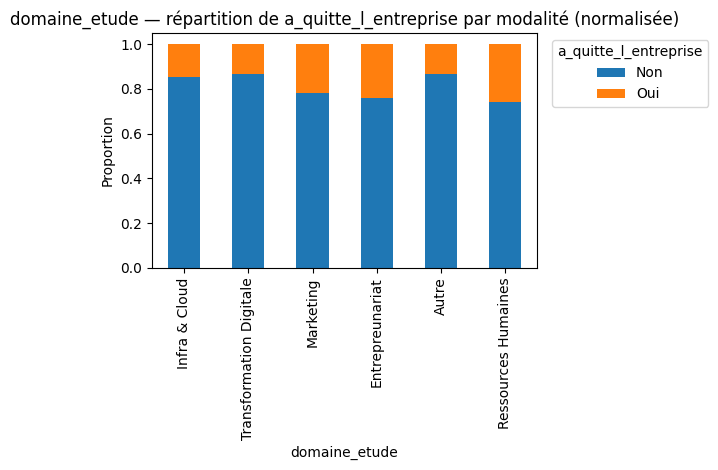

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


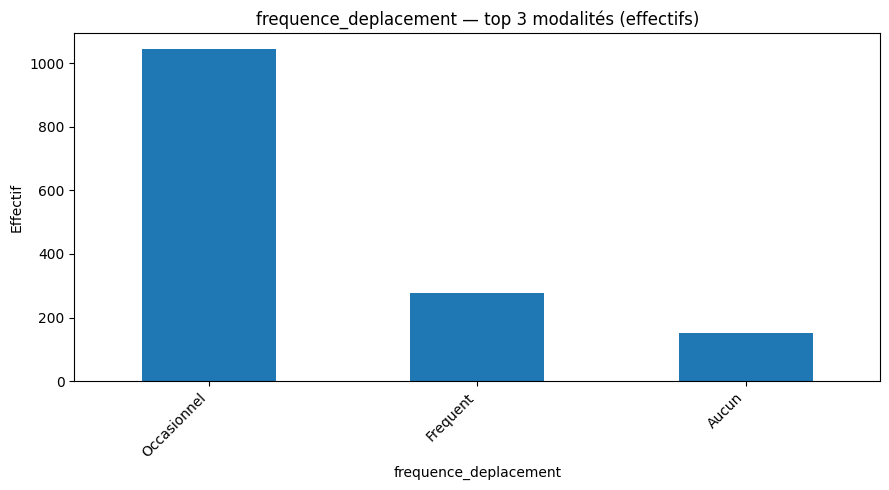

<Figure size 900x500 with 0 Axes>

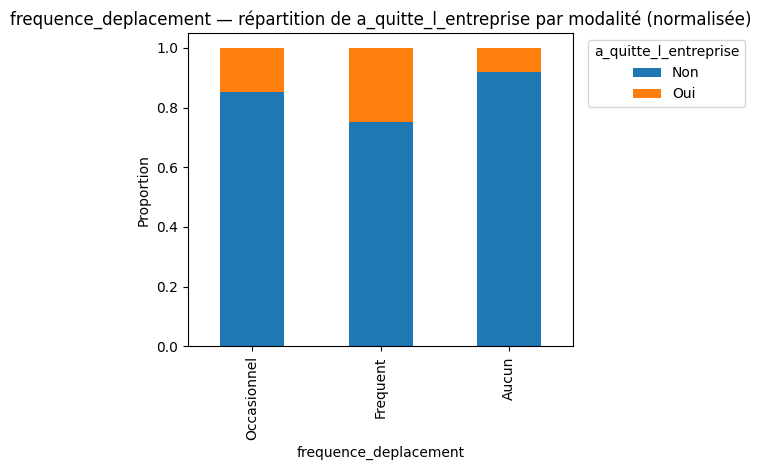

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


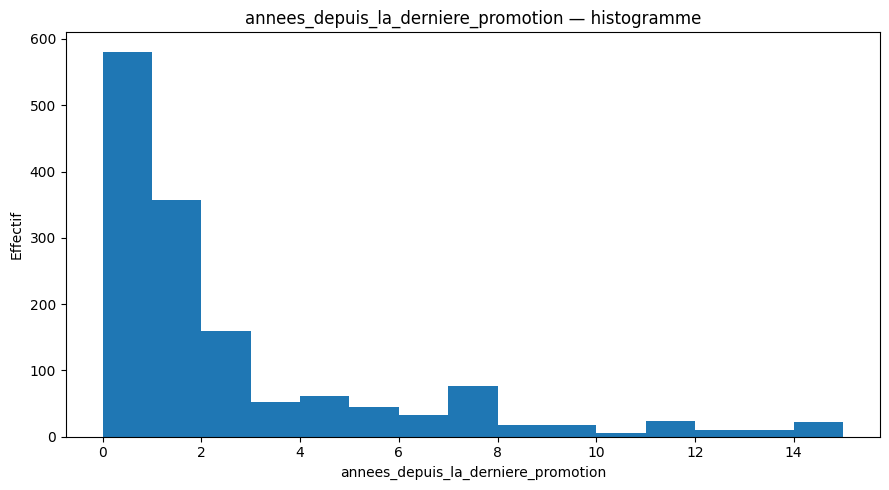

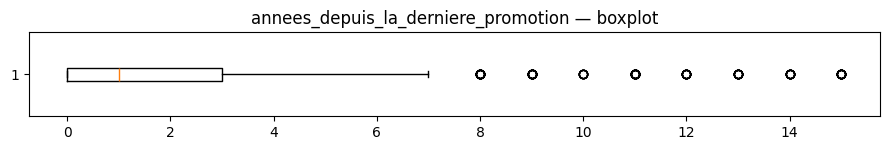

C:\Users\thoma\AppData\Local\Temp\ipykernel_21168\1264305212.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_qual = is_bool_dtype(s) or is_categorical_dtype(s) or is_string_dtype(s)


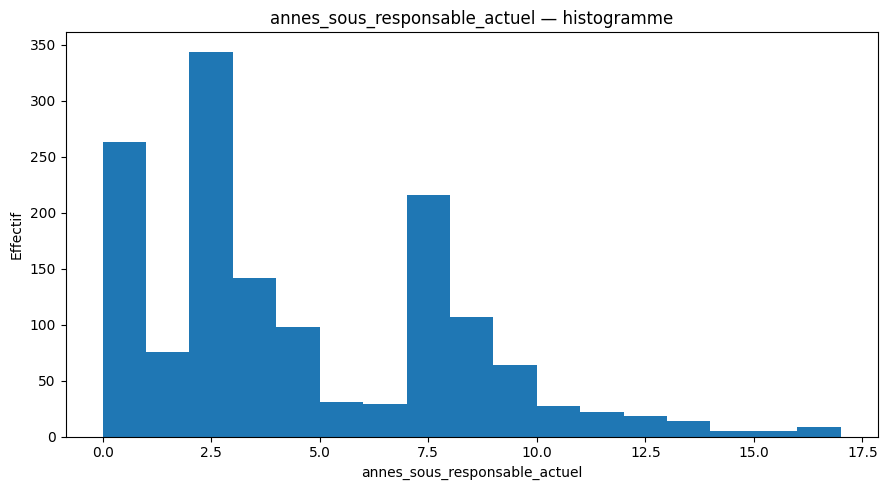

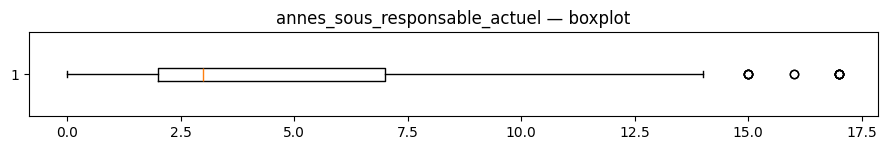

In [53]:
auto_plots(
    data,
    target="a_quitte_l_entreprise",
    id_cols=[],      # tu as déjà supprimé les colonnes inutiles
    top_n=20,
    bins="auto"
)

In [76]:
#delta sur l'évaluation precedente et actuelle
data["delta_note_evaluation"] = data["note_evaluation_precedente"]-data["note_evaluation_actuelle"]

#Années d’expérience hors entreprise
data["nb_annnee_hors_entreprise"] = (
    data["annee_experience_totale"] - data["annees_dans_l_entreprise"]
).clip(lower=0)

data["ratio_dans_et_hors_entreprise"] = np.where(
    data["annee_experience_totale"] > 0,
    data["nb_annnee_hors_entreprise"] / data["annee_experience_totale"],
    np.nan
)

data["hors_entreprise_majoritaire"] = data["ratio_dans_et_hors_entreprise"] >= 0.5 

#Années passées en dehors du poste actuel 
cols = ["annees_dans_l_entreprise", "annees_dans_le_poste_actuel"]
data[cols] = data[cols].apply(pd.to_numeric, errors="coerce")

data["Ecart_nb_annee_sur_poste"] = (
    data["annees_dans_l_entreprise"] - data["annees_dans_le_poste_actuel"]
).clip(lower=0)

valid = data[cols].notna().all(axis=1)
data["a_connu_mvmnt_interne"] = (
    data["Ecart_nb_annee_sur_poste"].gt(0)       
    .where(valid, pd.NA)                
    .astype("boolean")
)

del data["revenu_mensuel"]
del data["annee_experience_totale"]
del data["annees_dans_le_poste_actuel"]
del data["annes_sous_responsable_actuel"]


In [70]:
X = data.drop(columns=["a_quitte_l_entreprise"])

y = data["a_quitte_l_entreprise"]

In [71]:
dummy = DummyClassifier(strategy="most_frequent")  # ou "stratified" pour aléatoire

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

print("Accuracy           :", accuracy_score(y_test, y_pred_dummy))
print("Balanced accuracy  :", balanced_accuracy_score(y_test, y_pred_dummy))
print("\nClassification report:\n", classification_report(y_test, y_pred_dummy))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_dummy))

# (Optionnel) contrôle rapide du baseline théorique
print("\nBaseline (majorité dans tout le set) :", y.value_counts(normalize=True).max())

Accuracy           : 0.8401360544217688
Balanced accuracy  : 0.5

Classification report:
               precision    recall  f1-score   support

         Non       0.84      1.00      0.91       247
         Oui       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294


Confusion matrix:
 [[247   0]
 [ 47   0]]

Baseline (majorité dans tout le set) : 0.8387755102040816


c:\Users\thoma\AppData\Local\pypoetry\Cache\virtualenvs\projet4-KgNUqIF9-py3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thoma\AppData\Local\pypoetry\Cache\virtualenvs\projet4-KgNUqIF9-py3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thoma\AppData\Local\pypoetry\Cache\virtualenvs\projet4-KgNUqIF9-py3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sampl

In [77]:
import numpy as np
import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report,
    confusion_matrix, average_precision_score, roc_auc_score
)

# 1) X / y (sans target encoding)
df = data.copy()
y = df["a_quitte_l_entreprise"].map({"Non": 0, "Oui": 1}).astype(int)
X = df.drop(columns=["a_quitte_l_entreprise"])

# 2) Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

# 3) Colonnes numériques vs catégorielles
num_cols = X.select_dtypes(include=["number", "float64", "int64", "Int64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# 4) Préprocesseur (sans cible)
preproc = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            # with_mean=False pour ne pas densifier si la sortie globale est sparse
            ("scaler", StandardScaler(with_mean=False)),
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore")),  # pas de target, OK
        ]), cat_cols),
    ],
    remainder="drop"
)

# 5) Baseline Dummy (majorité)
pipe_dummy = Pipeline([
    ("prep", preproc),
    ("clf", DummyClassifier(strategy="most_frequent"))
])
pipe_dummy.fit(X_train, y_train)
yp_dummy = pipe_dummy.predict(X_test)
ypd_proba = getattr(pipe_dummy, "predict_proba", lambda X: np.c_[1-yp_dummy, yp_dummy])(X_test)[:, 1]

print("=== Dummy (most_frequent) ===")
print("Accuracy           :", accuracy_score(y_test, yp_dummy))
print("Balanced accuracy  :", balanced_accuracy_score(y_test, yp_dummy))
print("Avg Precision (PR) :", average_precision_score(y_test, ypd_proba))
print("ROC AUC            :", roc_auc_score(y_test, ypd_proba))
print("Report:\n", classification_report(y_test, yp_dummy))
print("Confusion:\n", confusion_matrix(y_test, yp_dummy))

# 6) Modèle simple : Régression logistique (class_weight balanced)
pipe_logit = Pipeline([
    ("prep", preproc),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=2000))
])
pipe_logit.fit(X_train, y_train)
yp_logit = pipe_logit.predict(X_test)
yp_logit_proba = pipe_logit.predict_proba(X_test)[:, 1]

print("\n=== LogisticRegression (balanced) ===")
print("Accuracy           :", accuracy_score(y_test, yp_logit))
print("Balanced accuracy  :", balanced_accuracy_score(y_test, yp_logit))
print("Avg Precision (PR) :", average_precision_score(y_test, yp_logit_proba))
print("ROC AUC            :", roc_auc_score(y_test, yp_logit_proba))
print("Report:\n", classification_report(y_test, yp_logit))
print("Confusion:\n", confusion_matrix(y_test, yp_logit))


=== Dummy (most_frequent) ===
Accuracy           : 0.8401360544217688
Balanced accuracy  : 0.5
Avg Precision (PR) : 0.1598639455782313
ROC AUC            : 0.5
Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

Confusion:
 [[247   0]
 [ 47   0]]

=== LogisticRegression (balanced) ===
Accuracy           : 0.7959183673469388
Balanced accuracy  : 0.7665604272547162
Avg Precision (PR) : 0.5552349508151052
ROC AUC            : 0.7999827719872513
Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       247
           1       0.42      0.72      0.53        47

    accuracy                           0.80       294
   macro avg       0.68      0.77      0.70

c:\Users\thoma\AppData\Local\pypoetry\Cache\virtualenvs\projet4-KgNUqIF9-py3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thoma\AppData\Local\pypoetry\Cache\virtualenvs\projet4-KgNUqIF9-py3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thoma\AppData\Local\pypoetry\Cache\virtualenvs\projet4-KgNUqIF9-py3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sampl

In [78]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report,
    confusion_matrix, average_precision_score, roc_auc_score
)

# =========================
# 0) X / y et split (reprend ton setup)
# =========================
df = data.copy()
y = df["a_quitte_l_entreprise"].map({"Non": 0, "Oui": 1}).astype(int)
X = df.drop(columns=["a_quitte_l_entreprise"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

num_cols = X.select_dtypes(include=["number", "float64", "int64", "Int64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# =========================
# 1) Préprocesseurs
# =========================
def make_preproc(dense: bool):
    # Si dense=True: on force une sortie dense (OneHot dense + scaler with_mean=True)
    # Si dense=False: sortie sparse (utile pour LinearSVC)
    num_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler(with_mean=dense)),  # with_mean=False si sparse
    ])
    ohe = OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=not dense)

    # sparse_threshold=0 force dense si dense=True
    return ColumnTransformer(
        transformers=[
            ("num", num_pipe, num_cols),
            ("cat", Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", ohe)]), cat_cols),
        ],
        remainder="drop",
        sparse_threshold=0.0 if dense else 1.0
    )

# =========================
# 2) Évaluation générique
# =========================
def evaluate_model(name, clf, dense_needed: bool):
    preproc = make_preproc(dense_needed)
    pipe = Pipeline([("prep", preproc), ("clf", clf)])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    # Probabilités / scores pour AUC & PR-AUC
    if hasattr(pipe, "predict_proba"):
        y_score = pipe.predict_proba(X_test)[:, 1]
    elif hasattr(pipe, "decision_function"):
        y_score = pipe.decision_function(X_test)  # scores continus OK pour AUC/AP
    else:
        # fallback (rare)
        y_score = y_pred

    print(f"\n=== {name} ===")
    print("Accuracy           :", accuracy_score(y_test, y_pred))
    print("Balanced accuracy  :", balanced_accuracy_score(y_test, y_pred))
    try:
        print("Avg Precision (PR) :", average_precision_score(y_test, y_score))
        print("ROC AUC            :", roc_auc_score(y_test, y_score))
    except Exception as e:
        print(f"(AUC/PR indisponibles: {e})")

    print("Confusion:\n", confusion_matrix(y_test, y_pred))
    print("Report:\n", classification_report(y_test, y_pred, zero_division=0))

    return pipe

# =========================
# 3) Modèles à tester
# =========================

# a) Forêt aléatoire (gère relativement bien l'imbalance avec class_weight)
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=2,
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42
)
pipe_rf = evaluate_model("RandomForest", rf, dense_needed=True)

# b) HistGradientBoosting (rapide et souvent très performant tabulaire)
hgb = HistGradientBoostingClassifier(
    max_depth=None,
    learning_rate=0.1,
    max_iter=300,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
    # (pas de class_weight ici; on compensera avec la métrique choisie et, plus tard, le tuning)
)
pipe_hgb = evaluate_model("HistGradientBoosting", hgb, dense_needed=True)

# c) LinearSVC + calibration (pour avoir des proba et gérer l'imbalance)
lsvc = LinearSVC(class_weight="balanced", random_state=42)
svc_cal = CalibratedClassifierCV(lsvc, method="sigmoid", cv=5)
pipe_svc = evaluate_model("LinearSVC (Calibrated)", svc_cal, dense_needed=False)



=== RandomForest ===
Accuracy           : 0.8435374149659864
Balanced accuracy  : 0.5450943233697992
Avg Precision (PR) : 0.4707014179577681
ROC AUC            : 0.8023085537083297
Confusion:
 [[243   4]
 [ 42   5]]
Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.56      0.11      0.18        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.55       294
weighted avg       0.81      0.84      0.80       294


=== HistGradientBoosting ===
Accuracy           : 0.8537414965986394
Balanced accuracy  : 0.6028512361099148
Avg Precision (PR) : 0.5176838041488239
ROC AUC            : 0.7980015505211475
Confusion:
 [[240   7]
 [ 36  11]]
Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.61      0.23      0.34        47

    accuracy                           0.85      